In [2]:
## Load the data
library(gdata) 
library(ggplot2)
library(gridExtra)
library(ggpubr)

In [3]:
exp <- readRDS("/data/srlab/public/srcollab/AMP/amp_phase1_ra/data/filtered_log2tpm_lowinput_phase_1.rds")
dim(exp)
meta <- readRDS("/data/srlab/public/srcollab/AMP/amp_phase1_ra/data/filtered_meta_lowinput_phase_1.rds")
meta <- meta[, c("Donor.ID", "Sample.ID", "Cell.type")]
meta[1:4,]
dim(meta)
all(colnames(exp) == meta$Sample.ID)

[1] 41669   167

,Donor.ID,Sample.ID,Cell.type
64,300-0512,S232,Monocyte
131,301-0156,S10,Monocyte
138,301-0158,S18,Monocyte
114,301-0151,S26,Monocyte


[1] 167   3

[1] TRUE

In [4]:
label <- read.xls("/data/srlab/public/srcollab/AMP/amp_phase1_ra/data/postQC_all_samples.xlsx")
label <- label[, c("Patient", "Disease", "Mahalanobis")]
colnames(label)[1] <- c("Donor.ID")
label[1:4,]

Donor.ID,Disease,Mahalanobis
301-0132,OA,1.178928
301-0133,OA,2.652396
301-0135,OA,3.085167
301-0155,OA,2.559205


In [5]:
meta_new <- merge(x = meta, y = label, by = "Donor.ID", all.x = TRUE)
dim(meta_new)

meta_new$classification <- rep("OA", nrow(meta_new))
meta_new[which(meta_new$Mahalanobis > 4.5 & meta_new$Disease == "RA"),]$classification <- "leukocyte-rich RA"
meta_new[which(meta_new$Mahalanobis <= 4.5 & meta_new$Disease == "RA"),]$classification <- "leukocyte-poor RA"
meta_new[1:4,]
table(meta_new$classification)

[1] 167   5

Donor.ID,Sample.ID,Cell.type,Disease,Mahalanobis,classification
300-0121,S178,Monocyte,RA,6.611699,leukocyte-rich RA
300-0121,S177,Fibroblast,RA,6.611699,leukocyte-rich RA
300-0121,S179,T cell,RA,6.611699,leukocyte-rich RA
300-0122,S184,B cell,RA,410.052790,leukocyte-rich RA



leukocyte-poor RA leukocyte-rich RA                OA 
               36                86                45 

In [6]:
all(meta_new$Sample.ID == colnames(exp))
meta_new <- meta_new[order(match(meta_new$Sample.ID, colnames(exp))), ]
all(meta_new$Sample.ID == colnames(exp))

[1] FALSE

[1] TRUE

In [7]:
# Only plot the monocytes
meta_new <- meta_new[which(meta_new$Cell.type == "Monocyte"),]
exp <- exp[, meta_new$Sample.ID]
all(meta_new$Sample.ID == colnames(exp))

[1] TRUE

In [8]:
table(meta_new$classification)


leukocyte-poor RA leukocyte-rich RA                OA 
               11                23                13 

In [9]:
plot_bulk_dots <- function(dat, marker = "") {
  ggplot(
        data    = dat,
        mapping = aes(
        x = classification, y = marker, group = classification
      ),
      shape = 20, stroke = 0.15, size = 3
     ) +
    geom_boxplot() +
    geom_jitter(width = 0.15 
    ) +
    scale_y_continuous(breaks = scales::extended_breaks(n = 4)) +
    scale_x_discrete(limits = rev(levels(dat$cluster))) +
#     coord_flip() +
    labs(
      x     = NULL,
      y     = bquote("Log"[2]~"(TPM+1)"),
      title = marker
      # subtitle = tsne_subtitle
    ) +
    theme_bw(base_size = 22) + theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
      axis.title.y=element_blank(),
      panel.grid      = element_blank(),
      panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    )
}


null device 
          1

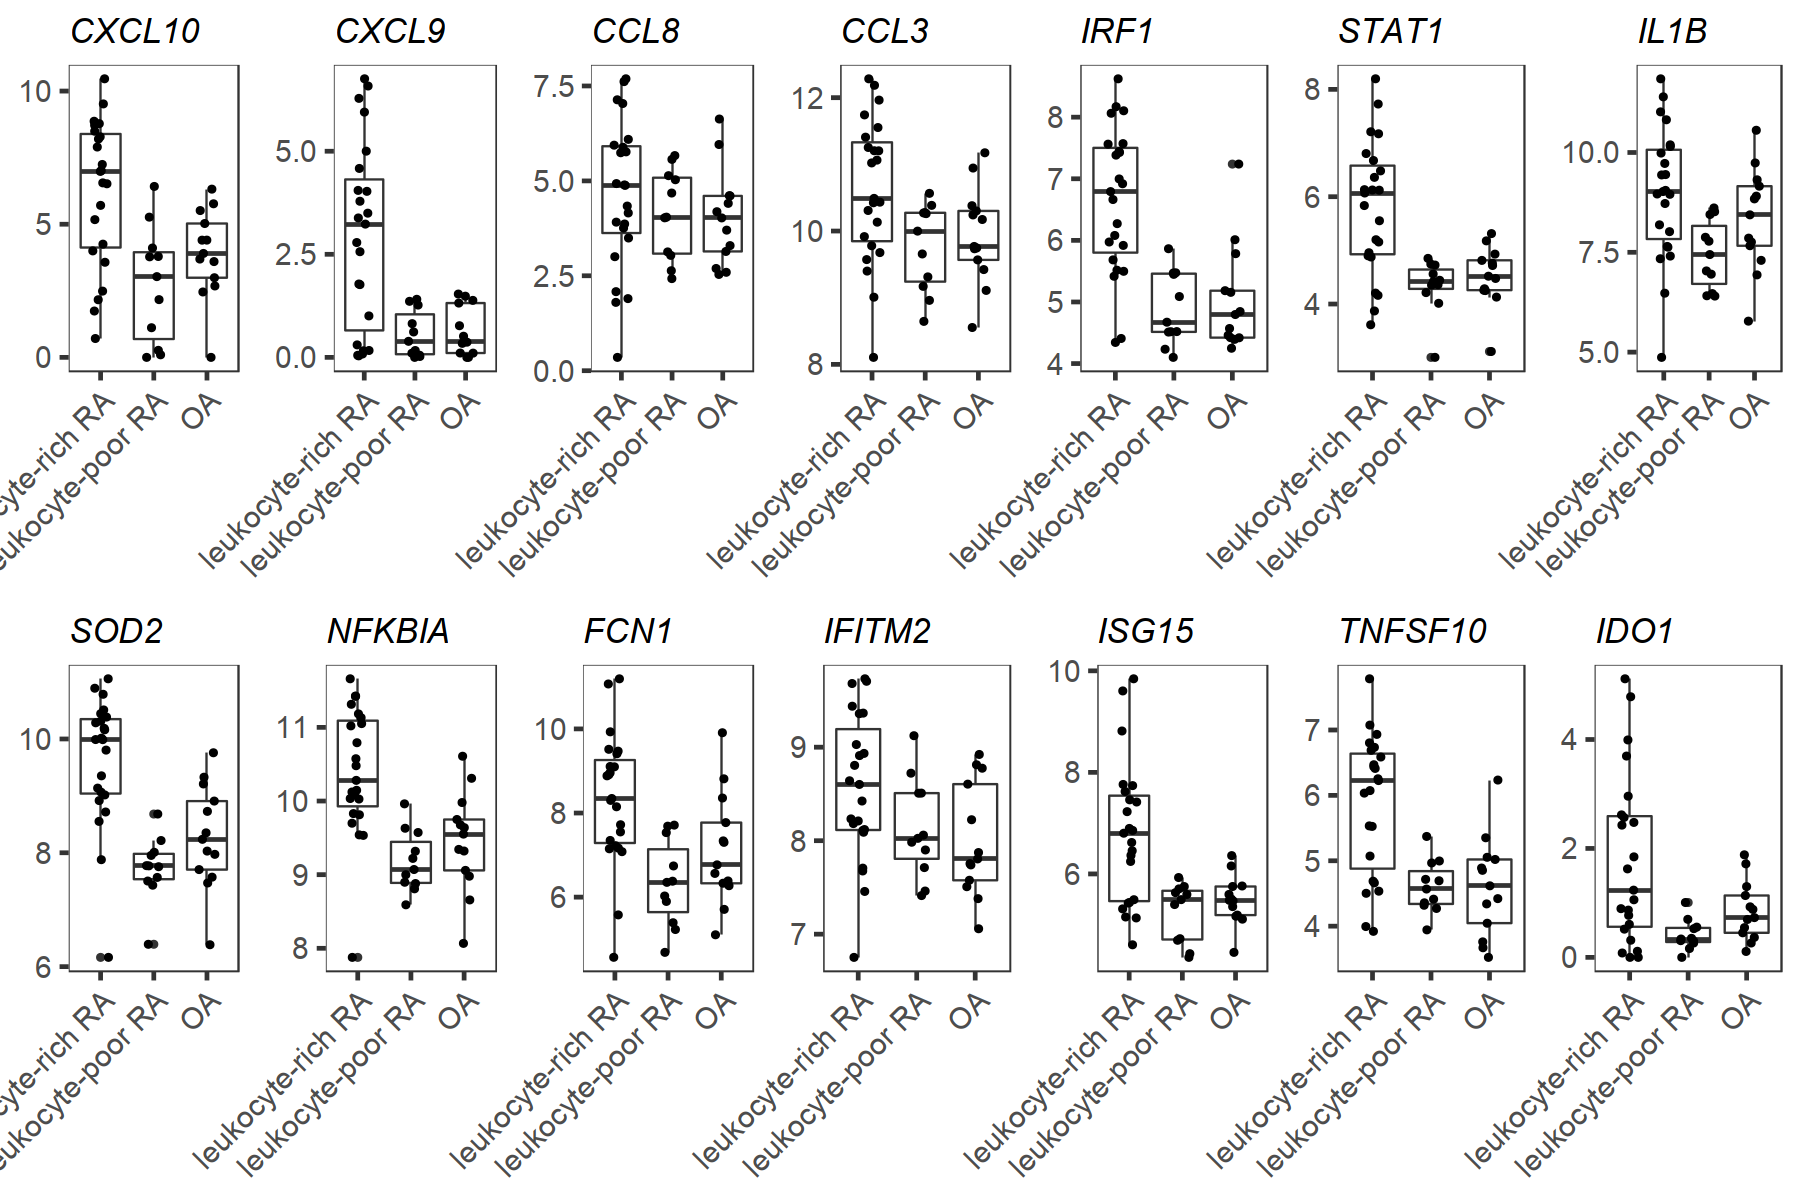

In [10]:
options(repr.plot.height = 5, repr.plot.width = 3)
meta_new$classification <- factor(meta_new$classification, levels = c("leukocyte-rich RA", "leukocyte-poor RA", "OA"))
meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CXCL10"),])
p1 <- plot_bulk_dots(meta_new, "CXCL10")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CXCL9"),])
p2 <- plot_bulk_dots(meta_new, "CXCL9")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CCL8"),])
p3 <- plot_bulk_dots(meta_new, "CCL8")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CCL3"),])
p4 <- plot_bulk_dots(meta_new, "CCL3")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IRF1"),])
p5 <- plot_bulk_dots(meta_new, "IRF1")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "STAT1"),])
p6 <- plot_bulk_dots(meta_new, "STAT1")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IL1B"),])
p7 <- plot_bulk_dots(meta_new, "IL1B")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "SOD2"),])
p8 <- plot_bulk_dots(meta_new, "SOD2")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "NFKBIA"),])
p9 <- plot_bulk_dots(meta_new, "NFKBIA")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "FCN1"),])
p10 <- plot_bulk_dots(meta_new, "FCN1")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IFITM2"),])
p11 <- plot_bulk_dots(meta_new, "IFITM2")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "ISG15"),])
p12 <- plot_bulk_dots(meta_new, "ISG15")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "TNFSF10"),])
p13 <- plot_bulk_dots(meta_new, "TNFSF10")

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IDO1"),])
p14 <- plot_bulk_dots(meta_new, "IDO1")



options(repr.plot.height = 10, repr.plot.width = 15)
all <- grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13, p14, ncol = 7)
ggsave(file = paste("mono_bulk", ".pdf", sep = ""), all, width = 15, height = 10, dpi = 300)
dev.off()

In [22]:
# The Kruskal-Wallis H test (sometimes also called the "one-way ANOVA on ranks") is a rank-based nonparametric test that can be used to determine if there are statistically significant differences between two or more groups of an independent variable on a continuous or ordinal dependent variable.

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CXCL10"),])
fit <- kruskal.test(marker ~ classification, data = meta_new) 
fit$p.value

[1] 0.00164906

.y.,group1,group2,p,p.adj,p.format,p.signif,method,y.position
marker,leukocyte-rich RA,leukocyte-poor RA,0.0004900917,0.0015,0.00049,***,T-test,11.660814
marker,leukocyte-rich RA,OA,0.0032832148,0.0066,0.00328,**,T-test,10.960814
marker,leukocyte-poor RA,OA,0.1613544124,0.1600,0.16135,ns,T-test,7.317351


null device 
          1

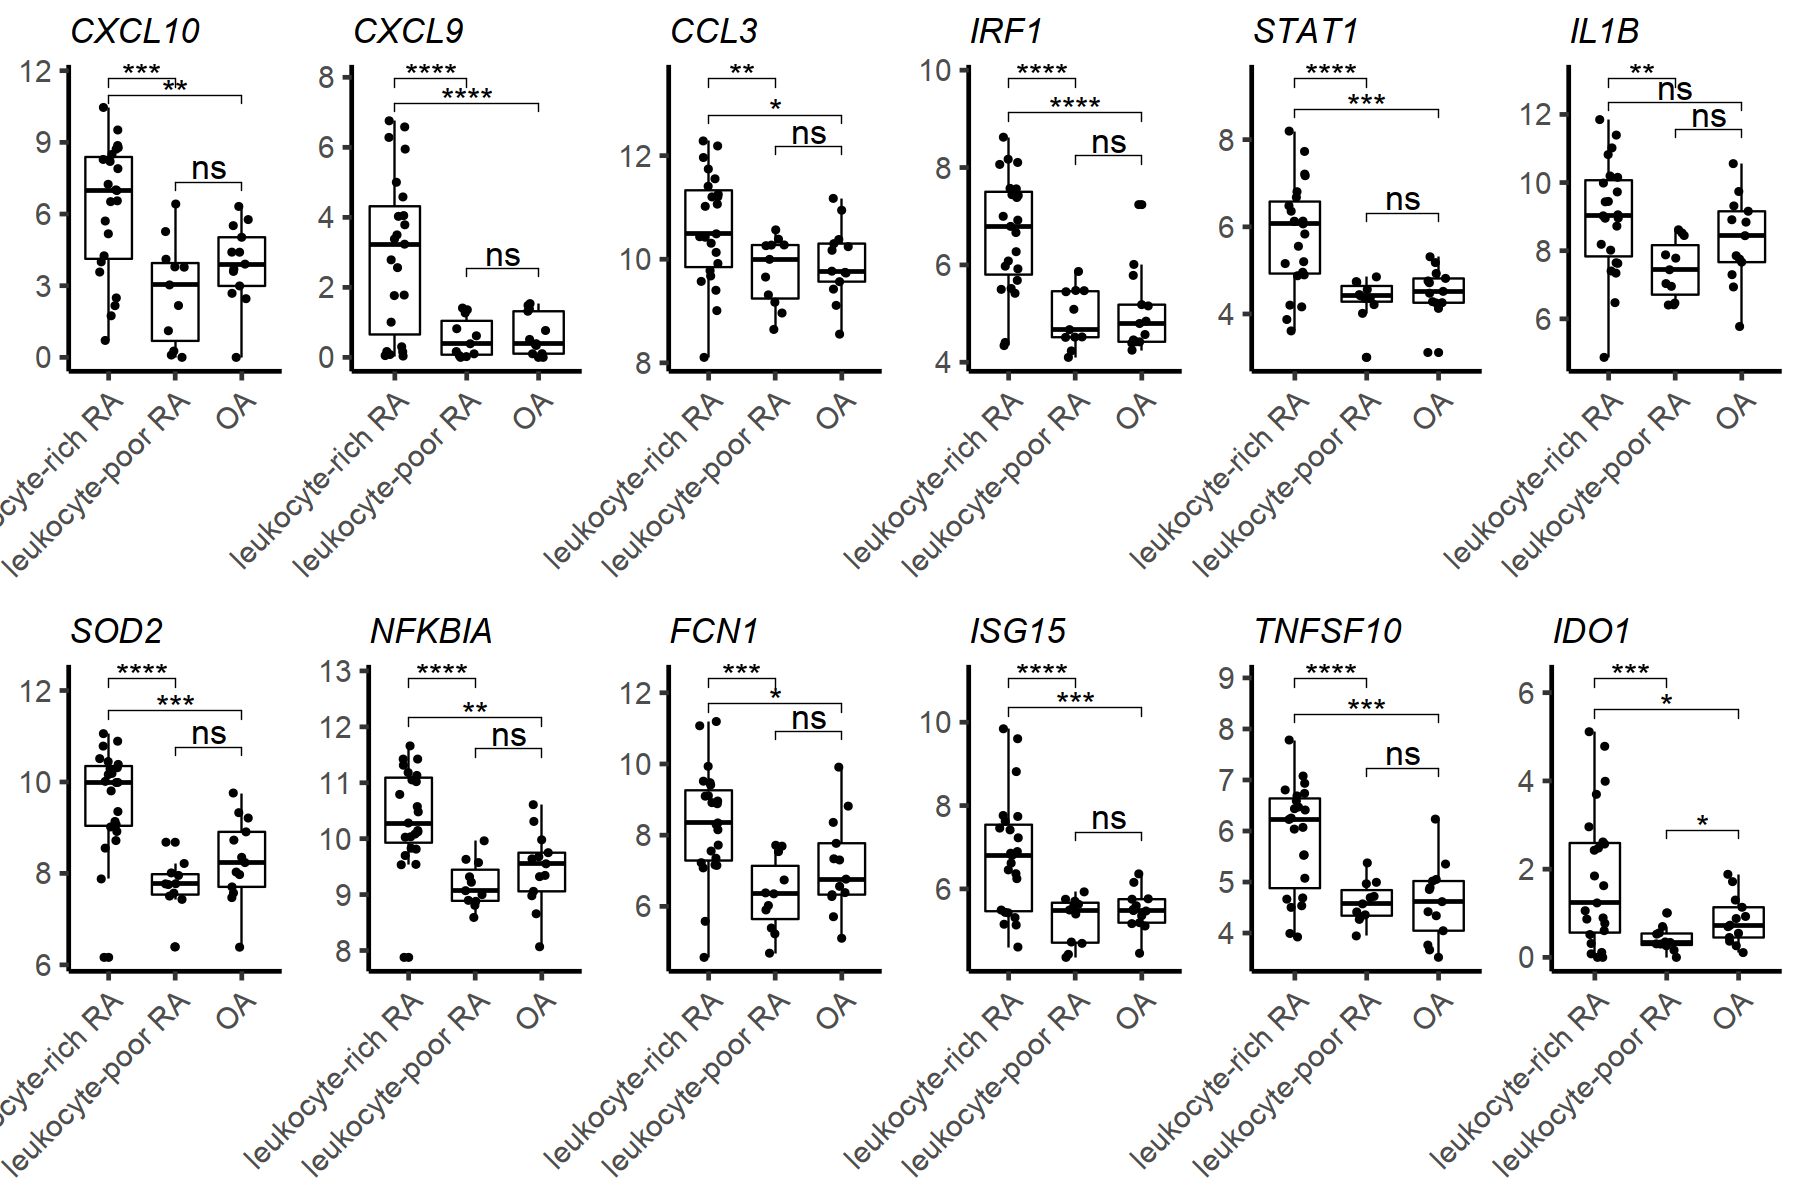

In [20]:
# T-test

meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CXCL10"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))
stat.test

# # Create a simple box plot
options(repr.plot.height = 5, repr.plot.width = 3)
p1 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "CXCL10"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)


meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CXCL9"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p2 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  + 
    labs(
      x     = NULL,
      y     = NULL,
      title = "CXCL9"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CCL8"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p3 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +
    labs(
      x     = NULL,
      y     = NULL,
      title = "CCL8"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)




meta_new$marker <- as.numeric(exp[which(rownames(exp) == "CCL3"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p4 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "CCL3"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)




meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IRF1"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p5 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "IRF1"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "STAT1"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p6 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "STAT1"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IL1B"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p7 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "IL1B"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "SOD2"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p8 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "SOD2"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)




meta_new$marker <- as.numeric(exp[which(rownames(exp) == "NFKBIA"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p9 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "NFKBIA"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "FCN1"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p10 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "FCN1"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)




meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IFITM2"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p11 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "IFITM2"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "ISG15"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p12 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "ISG15"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "TNFSF10"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))

# # Create a simple box plot
p13 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "TNFSF10"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



meta_new$marker <- as.numeric(exp[which(rownames(exp) == "IDO1"),])
stat.test <- compare_means(
 marker ~ classification, data = meta_new,
 method = "t.test"
)

stat.test <- stat.test %>%
 mutate(y.position = c(max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 1.2, 
                       max(meta_new[which(meta_new$classification == "leukocyte-rich RA"),]$marker) + 0.5,
                      max(meta_new[which(meta_new$classification == "OA"),]$marker) + 1))


# # Create a simple box plot
p14 <- ggboxplot(meta_new, x = "classification", y = "marker") +  geom_jitter(width = 0.15)  +   
    labs(
      x     = NULL,
      y     = NULL,
      title = "IDO1"
    ) +
      theme_classic(base_size = 22) + 
      theme(
      # legend.position = "none",
      legend.key.size = unit(1.5, "lines"),
      axis.text.x = element_text(angle = 45, hjust = 1),
#       axis.title =element_blank(),
#       panel.grid      = element_blank(),
#       panel.border    = element_rect(size = 0.5),
      plot.title      = element_text(size = 20, face = "italic")
    ) +
   stat_pvalue_manual(stat.test, label = "{p.signif}", size = 7)



options(repr.plot.height = 10, repr.plot.width = 15)
all <- grid.arrange(p1, p2, p4, p5, p6, p7, p8, p9, p10, p12, p13, p14, ncol = 6)
ggsave(file = paste("mono_bulk", ".pdf", sep = ""), all, width = 15, height = 10, dpi = 300)
dev.off()